# Structure

- optimisation basics
- linear optimisation basics
- solving libraries
- introduction to the PuLP framework
- example: using PuLP to solve a Sudoku puzzle
- example: using PuLP to solve a Nonogram puzzle
- applications

# Python environment setup

In [16]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
figsize(15,5)

Populating the interactive namespace from numpy and matplotlib


# Optimisation basics

- aim to minimise or maximise a single value (same thing mathematically)
- if multiple objectives, define trade-offs betewen them, so still effectively a minimisation of one value
- terminology
    - unconstrained, e.g. minimise $f(x) = x^2 + 5$, solution $x = 0$, or
    - constrained, e.g. minimise $f(x) = x^2 +5$ where $x>3$, solution $x=3$
    - convex: gradients always lead to the global minimum
    - non-convex: there can exist local minima -- this can confuse optimisers that only follow the gradient
    - multi-dimensional: having more than one control variable
- three broad classes of problem:
    - P: polynomial time, e.g. 2 + 4 + 3
    - NP: nondeterministic polynomial time, e.g. sort([2,4,3])
    - NP hard: 

## Hardness of problems



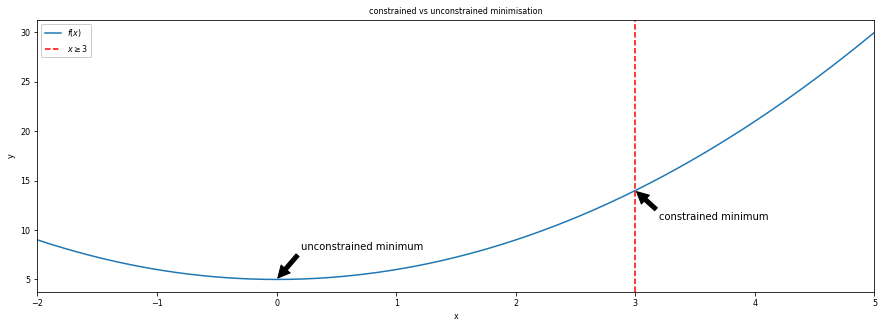

In [17]:
# constrained vs unconstrained minimisation example

title('constrained vs unconstrained minimisation')

def f(x):
    return x**2 + 5

x = linspace(-2,5, 1000)

plot(x,f(x), label='$f(x)$')
xlabel('x');
ylabel('y');

axvline(3, color='r', linestyle='--', label='$x \geq 3$')

xmin = 3
ymin = f(xmin)
annotate('constrained minimum', xy=(xmin,f(xmin)), xytext=(xmin+.2, ymin -3), arrowprops=dict(facecolor='black', shrink=0.05))

xmin = 0
ymin = f(xmin)
annotate('unconstrained minimum', xy=(xmin,f(xmin)), xytext=(xmin+.2, ymin +3), arrowprops=dict(facecolor='black', shrink=0.05))


xlim(-2,5)
legend()
grid(False)

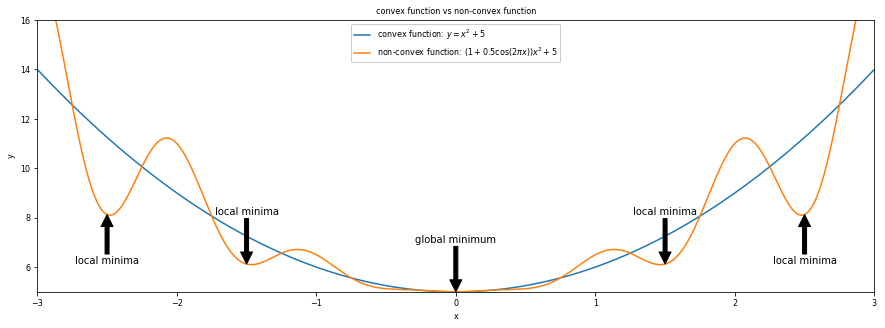

In [18]:
# convex function vs non-convex function

title('convex function vs non-convex function')

def convex(x):
    return x**2 + 5

def nonconvex(x):
    return (1 + 0.5*cos(2*pi*x)) * x**2 + 5

x = linspace(-3,3, 1000)
y = f(x)

plot(x,convex(x), label='convex function: $y = x^2 +5$')
plot(x,nonconvex(x), label='non-convex function: $(1 + 0.5 \cos(2 \pi x))  x^2 + 5$')

xlabel('x');
ylabel('y');

# From inspection it can be seen that minimas will occur when cos(2*pi*x) is at minimum. This occurs periodically whenever 2x is an odd integer. 
# Therefore there will be a minima when x = i + 0.5, where i is in the set of all integers. 


xmin = -2.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin -2), arrowprops=dict(facecolor='black'))

xmin = -1.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))

xmin = 1.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))

xmin = 2.5
ymin = nonconvex(xmin)
annotate('local minima', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin -2), arrowprops=dict(facecolor='black'))

xmin = 0
ymin = nonconvex(xmin)
annotate('global minimum', xy=(xmin,ymin), ha='center', xytext=(xmin, ymin +2), arrowprops=dict(facecolor='black'))


xlim(-3,3)
ylim(5,16)
legend(loc='upper center')
grid(False)

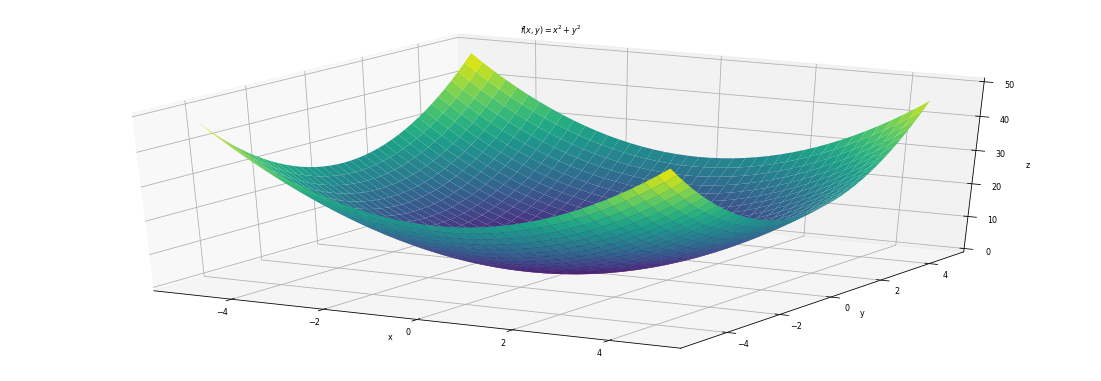

In [19]:
# multidimensional minimisation

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
ax.set_title('$f(x,y) = x^2 + y^2$');

# Linear optimisation

- means only linear combinations of decision varaibles:
    - e.g. $\min ( x + y ) $ is ok, but $\min (x y)$ or $ min(x^2 + y)$ is not ok
- is convex as all linear functions are convex
- is constrained (has to be as any unconstrained linear function would have a minimum of negative infinity)
- is solvable in polynomial time and is therefore [NP complete](https://en.wikipedia.org/wiki/NP_(complexity))

e.g. <br>
> minimise <br>
> $x - 5y$ <br>
> subject to <br>
>   $x \geq 5$ <br>
>   $y \leq 3$ <br>

- can include integer variables, in which case it is know as mixed integer linear programming (MILP) -- more on this later


# Many valuable situations can be described this way



# Solving linear optimisation problems

- previous example is trivial and can be solved in your head
- but what about a more complex example?

> minimise <br>
> $4a+3b-10c+7d-12e+17f-14g-2h$ <br>
> subject to <br>
> $15a + 3c -f \geq 2a + h - 14b$ <br>
> $18d - e + 3b \leq 32h - 4a + h$ <br>
> $3e + 10c -2a \geq 18b - 13f + 17d$ <br>

# "The algroithm that runs the world"

- 